# Life Expectancy

## Scope of the Project

### Goals
* Describe the dependence of Life expetancy on the other numerical factors by Country
* Is life expectancy/GDP increasing over the years?
* Do the pct changes in GDP follow any particular distribution?
* Are there any momentum effects on the GDP's?

## Imports

In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Data

### Imports and Adjustments

In [106]:
data = pd.read_csv('all_data.csv')
print(data.head())
# Normalize GDP to order e+10
data['GDP'] = data['GDP'].map(lambda x: x/(10**10))
print(data.head())

# Simplify name of Life expectancy column
data.rename(columns={'Life expectancy at birth (years)':'Life'}, inplace=True)
print(data.head())
#
data_dict = {country: data[data['Country'] == country].drop(columns=['Country'], axis=1) for country in data.Country.unique()}

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
  Country  Year  Life expectancy at birth (years)       GDP
0   Chile  2000                              77.3  7.786093
1   Chile  2001                              77.3  7.097992
2   Chile  2002                              77.8  6.973681
3   Chile  2003                              77.9  7.564346
4   Chile  2004                              78.0  9.921039
  Country  Year  Life       GDP
0   Chile  2000  77.3  7.786093
1   Chile  2001  77.3  7.097992
2   Chile  2002  77.8  6.973681
3   Chile  2003  77.9  7.564346
4   Chile  2004  78.0  9.921039


### Exploration

We start with a quick comparison of the GDP and Life expetancy for each country

In [94]:
?sns.lineplot

Signature:
sns.lineplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    orient='x',
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ine

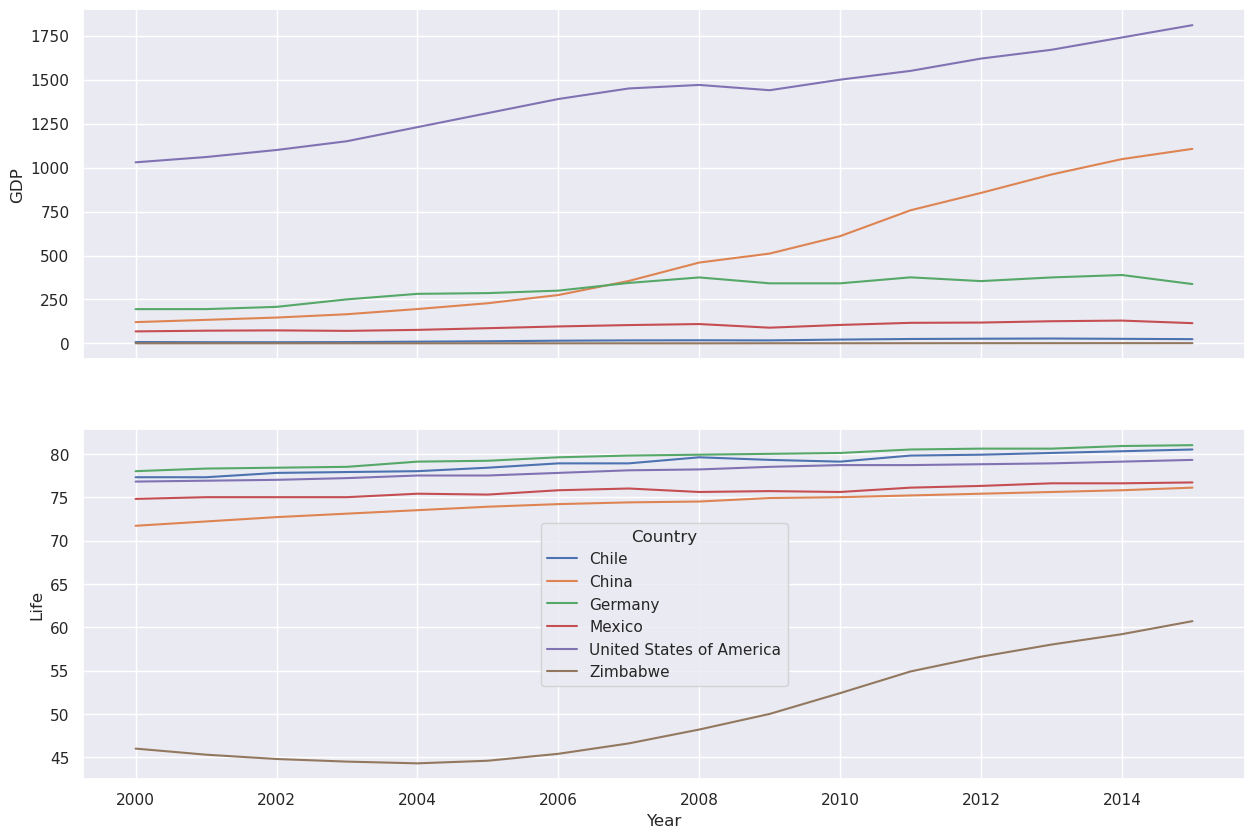

In [116]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True, sharey=False)

sns.lineplot(data=data, ax=ax[0], x="Year", y="GDP", hue="Country", legend=False)
sns.lineplot(data=data, ax=ax[1], x="Year", y="Life", hue='Country', legend='auto')
plt.show()

Unsurprisingly, the United States and China dominate the other countries in GDP, while a country like Zimbabwe seems to barely improve in GDP over time at all.

<Axes: xlabel='Life', ylabel='GDP'>

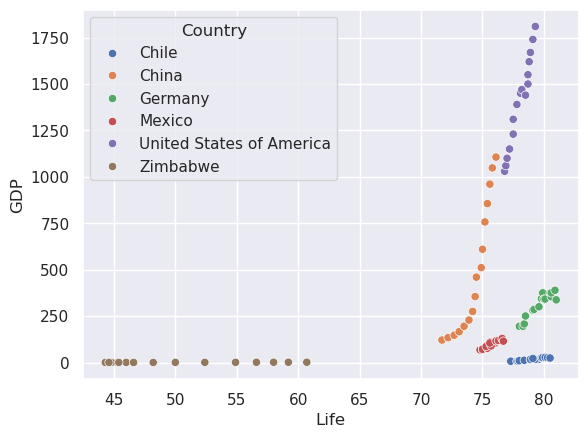

In [120]:
sns.scatterplot(data=data, x='Life', y='GDP', hue='Country')

count    15.000000
mean      0.083175
std       0.261442
min      -0.165581
25%      -0.041002
50%       0.013619
75%       0.130621
max       0.952480
Name: GDP, dtype: float64


<Axes: xlabel='GDP', ylabel='Count'>

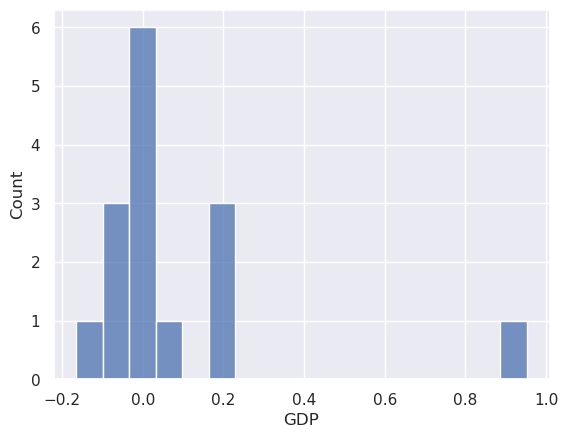

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

In [133]:
print(data_dict['Zimbabwe'].GDP.pct_change().dropna().describe())
?sns.histplot
sns.histplot(data=data_dict['Zimbabwe'].GDP.pct_change().dropna(), binwidth=1.0/15)